<a href="https://colab.research.google.com/github/Jeongin-Sharon-Kim/-/blob/main/%EC%9D%B4%EC%82%B0%EC%88%98%ED%95%99_%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# 행렬 입력 함수
def input_matrix():
    n = int(input("행렬의 크기 n을 입력하세요 (정방행렬): "))
    matrix = []
    print("각 행을 입력하세요:")
    for i in range(n):
        row = list(map(float, input(f"행 {i+1}: ").split()))
        if len(row) != n:
            raise ValueError("입력한 열의 개수가 n과 일치하지 않습니다.")
        matrix.append(row)
    return np.array(matrix)

In [35]:
# 행렬식 이용한 역행렬
def inverse_by_determinant(A):
    det = np.linalg.det(A)
    if abs(det) < 1e-10:
        print("행렬식이 0이므로 역행렬이 존재하지 않습니다.")
        return None
    inv = np.linalg.inv(A)
    return inv

In [36]:
# 가우스-조던 소거법
def inverse_by_gauss_jordan(A):
    n = len(A)
    A = np.array(A, dtype=float)
    I = np.identity(n)
    aug = np.concatenate((A, I), axis=1)

    for i in range(n):
        # 피벗이 0이면 교환
        if aug[i, i] == 0:
            for j in range(i + 1, n):
                if aug[j, i] != 0:
                    aug[[i, j]] = aug[[j, i]]
                    break
            else:
                print("가우스-조던 실패: 역행렬이 존재하지 않습니다.")
                return None
        # 피벗을 1로 만들기
        aug[i] = aug[i] / aug[i, i]
        # 다른 행 0으로 만들기
        for j in range(n):
            if i != j:
                aug[j] = aug[j] - aug[j, i] * aug[i]
    inv = aug[:, n:]
    return inv


In [37]:
# 추가 기능_시각적으로 행렬 출력
def visualize_matrix(matrix, title="Matrix"):
    plt.imshow(matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label='Value')
    plt.title(title)
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')
    plt.show()


In [38]:
# 결과 비교, 출력
def compare_results(inv1, inv2):
    if inv1 is None or inv2 is None:
        print("역행렬이 존재하지 않음. 비교 불가.")
        return

    print("\n<행렬식 이용 결과>>")
    print(inv1)
    print("\n<가우스-조던 이용 결과>")
    print(inv2)

    if np.allclose(inv1, inv2):
        print("두 방법의 결과가 동일합니다")
    else:
        print("두 방법의 결과가 다릅니다.")

    # 시각적 출력 기능 추가
    visualize_matrix(inv1, "Inverse Matrix (determinant)")
    visualize_matrix(inv2, "Inverse Matrix (Gauss-Jordan elimination)")

행렬의 크기 n을 입력하세요 (정방행렬): 4
각 행을 입력하세요:
행 1: 3 5 1 3
행 2: 0 0 2 1
행 3: 4 2 1 9
행 4: 3 2 5 1

<행렬식 이용 결과>>
[[-0.19512195 -0.87804878  0.12195122  0.36585366]
 [ 0.30731707  0.28292683 -0.11707317 -0.15121951]
 [-0.0097561   0.35609756 -0.04390244  0.06829268]
 [ 0.0195122   0.28780488  0.08780488 -0.13658537]]

<가우스-조던 이용 결과>
[[-0.19512195 -0.87804878  0.12195122  0.36585366]
 [ 0.30731707  0.28292683 -0.11707317 -0.15121951]
 [-0.0097561   0.35609756 -0.04390244  0.06829268]
 [ 0.0195122   0.28780488  0.08780488 -0.13658537]]
두 방법의 결과가 동일합니다


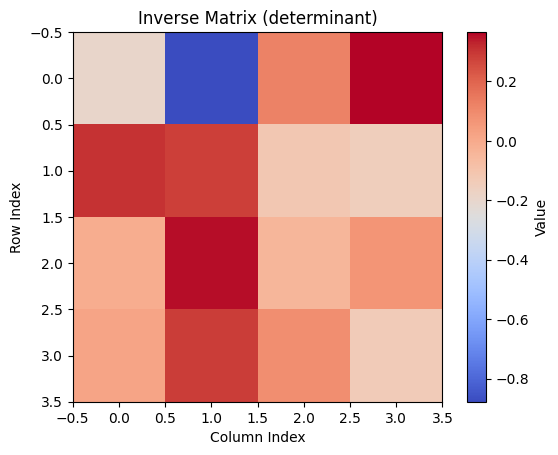

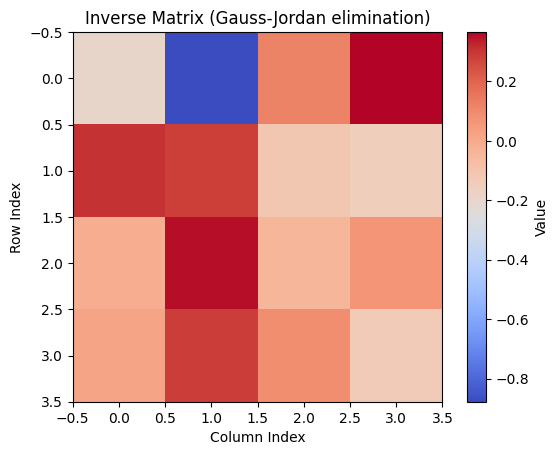

In [39]:
def main():
    A = input_matrix()
    inv1 = inverse_by_determinant(A)
    inv2 = inverse_by_gauss_jordan(A)
    compare_results(inv1, inv2)

if __name__ == "__main__":
    main()
